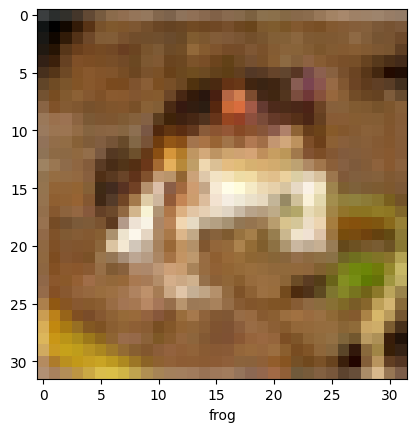

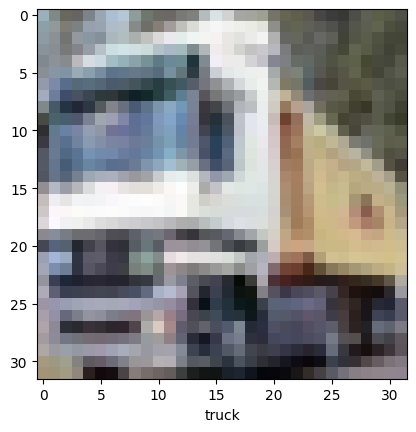

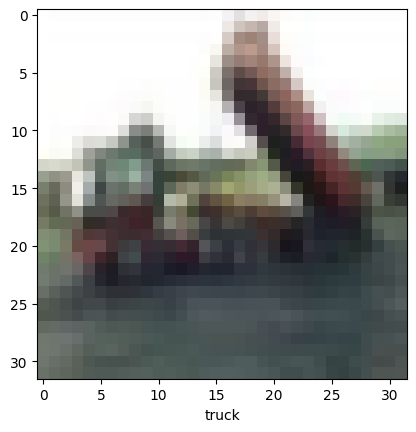

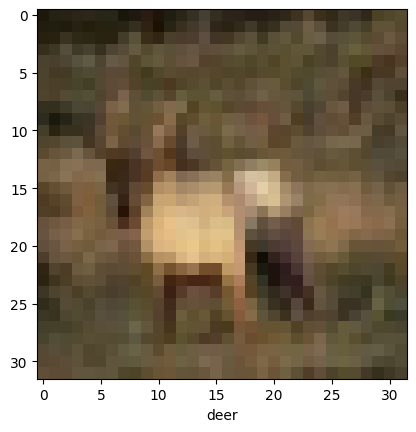

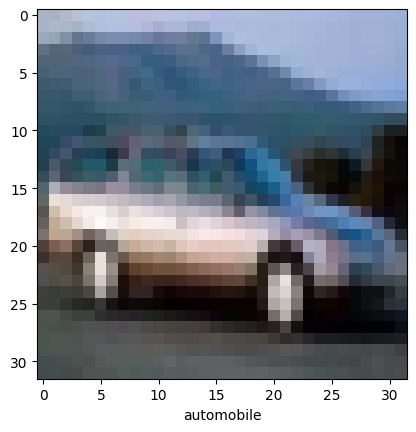

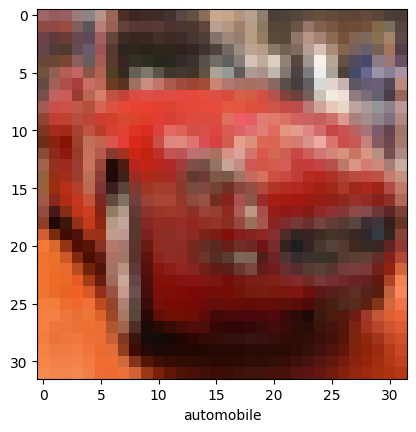

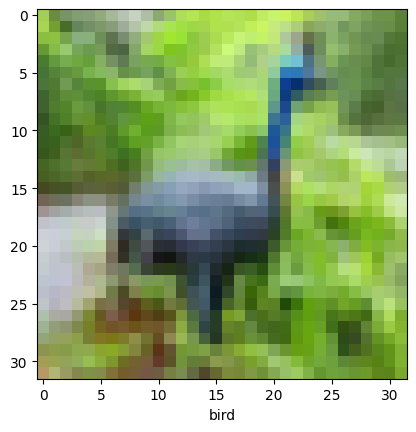

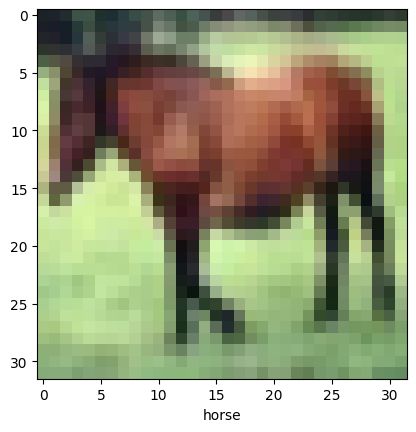

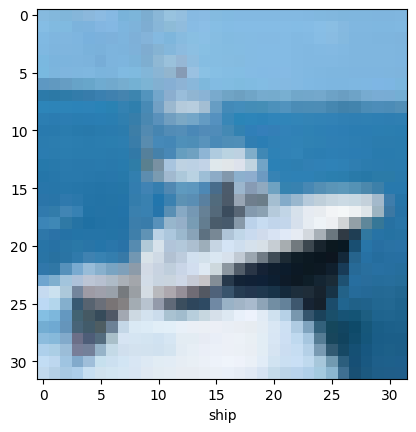

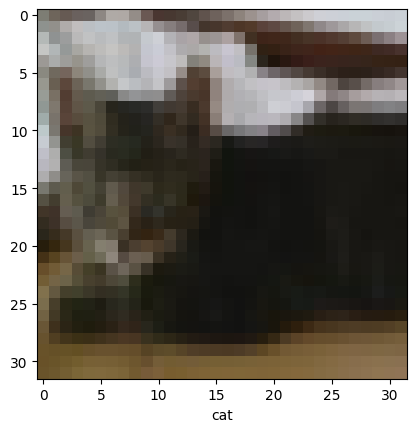

In [ ]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# Cifar 10 데이터셋의 처음 10개 이미지 확인
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
  plt.imshow(X_train[i])
  plt.xlabel(class_names[Y_train[i][0]])
  plt.show()

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


Epoch 1: val_loss improved from inf to 1.25539, saving model to ./model/01-1.2554.hdf5

Epoch 2: val_loss improved from 1.25539 to 1.05817, saving model to ./model/02-1.0582.hdf5

Epoch 3: val_loss improved from 1.05817 to 1.05087, saving model to ./model/03-1.0509.hdf5

Epoch 4: val_loss improved from 1.05087 to 0.98463, saving model to ./model/04-0.9846.hdf5

Epoch 5: val_loss improved from 0.98463 to 0.92537, saving model to ./model/05-0.9254.hdf5

Epoch 6: val_loss improved from 0.92537 to 0.91471, saving model to ./model/06-0.9147.hdf5

Epoch 7: val_loss did not improve from 0.91471

Epoch 8: val_loss improved from 0.91471 to 0.89429, saving model to ./model/08-0.8943.hdf5

Epoch 9: val_loss did not improve from 0.89429

Epoch 10: val_loss improved from 0.89429 to 0.86760, saving model to ./model/10-0.8676.hdf5

Epoch 11: val_loss did not improve from 0.86760

Epoch 12: val_loss did not improve from 0.86760

Epoch 13: val_loss improved from 0.86760 to 0.85593, saving model to ./m

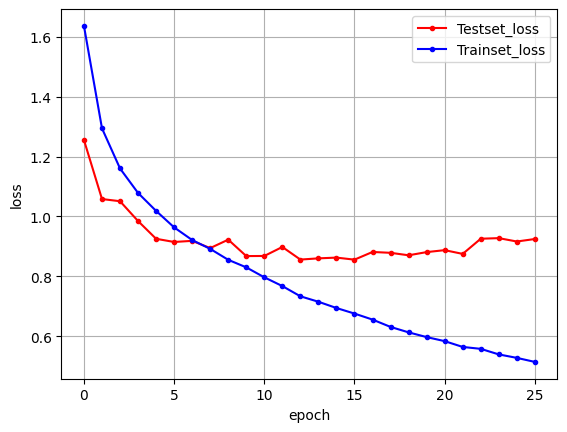

313/313 [==============================] - 1s 2ms/step
Actual Class: 3, Expect Class: 3
Actual Class: 8, Expect Class: 8
Actual Class: 8, Expect Class: 8
Actual Class: 0, Expect Class: 0
Actual Class: 6, Expect Class: 6
Actual Class: 6, Expect Class: 6
Actual Class: 1, Expect Class: 1
Actual Class: 6, Expect Class: 6
Actual Class: 3, Expect Class: 3
Actual Class: 1, Expect Class: 1


In [ ]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 실제 class와 CNN 딥러닝 모델의 예측 class 출력
Y_prediction = model.predict(X_test)
for i in range(10):
    label = numpy.argmax(Y_test[i], -1)
    prediction = numpy.argmax(Y_prediction[i])
    print("Actual Class: {}, Expect Class: {}".format(label, prediction))